In [1]:
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [2]:
PATH = Path('./data')
mnist_data = 'mnist_data'
cifar_data = 'cifar_data'

**MNIST Dataset (1 channel)**

In [3]:
def plot_mnist(images, shape):
    fig = plt.figure(figsize=shape[::-1], dpi=80)
    for j in range(1, len(images) + 1):
        ax = fig.add_subplot(shape[0], shape[1], j)
        ax.matshow(images[j - 1][0], cmap = plt.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [4]:
mnist_transform = transforms.Compose([
                      transforms.ToTensor()
                  ])

In [5]:
train_data = datasets.MNIST(PATH/mnist_data, train=True, download=True, transform=mnist_transform)
test_data = datasets.MNIST(PATH/mnist_data, train=False, download=True, transform=mnist_transform)

train_data[0][0].shape, train_data[0][1].shape

(torch.Size([1, 28, 28]), torch.Size([]))

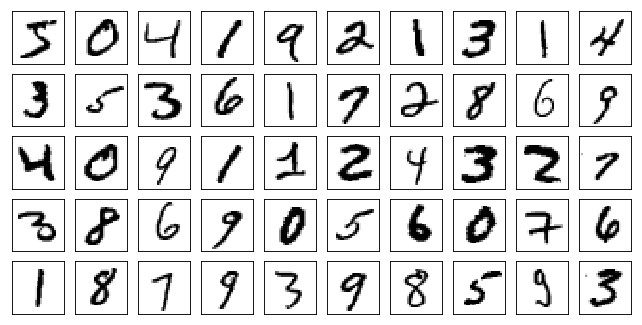

In [6]:
images = [train_data[i][0] for i in range(50)]
plot_mnist(images, (5, 10))

Load data as one batch

In [7]:
train_loader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)
train_loader

In [8]:
all_data = next(iter(train_loader))
all_data[0].shape, all_data[1].shape

(torch.Size([60000, 1, 28, 28]), torch.Size([60000]))

Mean/std

In [9]:
all_samples_mean = np.mean(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_std = np.std(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_mean, all_samples_std

(array([0.1306605], dtype=float32), array([0.308108], dtype=float32))

Load data by batch with 100 images

In [10]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
train_loader

In [11]:
sample = train_data[0][0]
pixels_count = sample.shape[1] * sample.shape[2]
pixels_count

784

Mean

In [12]:
samples_mean = np.sum([np.sum(X.numpy(), axis=(0, 2, 3)) for X, _ in train_loader]) / (len(train_data) * pixels_count)
samples_mean = np.atleast_1d(samples_mean)
samples_mean

array([0.13066048])

In [13]:
samples_squared_mean = np.sum([np.sum(X.numpy()**2, axis=(0, 2, 3)) for X, _ in train_loader]) / (len(train_data) * pixels_count)
samples_squared_mean

0.11200257227891157

Std

In [14]:
samples_std = np.sqrt(samples_squared_mean - samples_mean**2)
samples_std = np.atleast_1d(samples_std)
samples_std

array([0.30810779])

In [15]:
print(all_samples_mean, samples_mean)
print(all_samples_std, samples_std)

[0.1306605] [0.13066048]
[0.308108] [0.30810779]


MNIST Standartization

In [16]:
mnist_transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(samples_mean, samples_std)
                  ])

In [17]:
train_data = datasets.MNIST(PATH/mnist_data, train=True, download=True, transform=mnist_transform)
test_data = datasets.MNIST(PATH/mnist_data, train=False, download=True, transform=mnist_transform)

train_data[0][0].shape, train_data[0][1].shape

(torch.Size([1, 28, 28]), torch.Size([]))

In [18]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Split: train
     Root Location: data/mnist_data
     Transforms (if any): Compose(
                              ToTensor()
                              Normalize(mean=[0.13066048], std=[0.30810779])
                          )
     Target Transforms (if any): None, Dataset MNIST
     Number of datapoints: 10000
     Split: test
     Root Location: data/mnist_data
     Transforms (if any): Compose(
                              ToTensor()
                              Normalize(mean=[0.13066048], std=[0.30810779])
                          )
     Target Transforms (if any): None)

Check mean/std after standartization

In [19]:
train_loader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)
all_data = next(iter(train_loader))
all_samples_mean = np.mean(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_std = np.std(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_mean, all_samples_std

(array([3.547863e-08], dtype=float32), array([1.0000002], dtype=float32))

**CIFAR10 dataset (3 channels)**

In [20]:
def plot_cifar(images, shape):
    fig = plt.figure(figsize=shape[::-1], dpi=80)
    for j in range(1, len(images) + 1):
        ax = fig.add_subplot(shape[0], shape[1], j)
        image = np.transpose(images[j - 1], axes=(1, 2, 0))
        plt.imshow(image)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [21]:
cifar_transform = transforms.Compose([
                      transforms.ToTensor()
                  ])

In [22]:
train_data = datasets.CIFAR10(PATH/cifar_data, train=True, download=True, transform=cifar_transform)
test_data = datasets.CIFAR10(PATH/cifar_data, train=False, download=True, transform=cifar_transform)

Files already downloaded and verified
Files already downloaded and verified


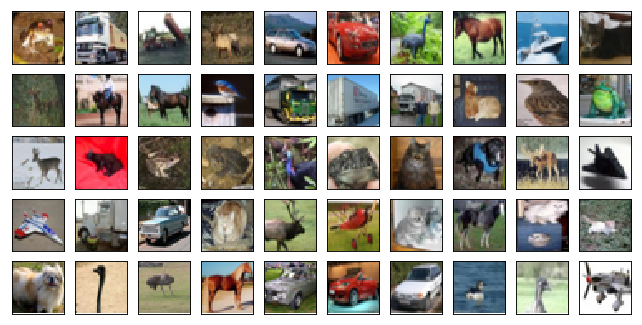

In [23]:
images = [train_data[i][0] for i in range(50)]
plot_cifar(images, (5, 10))

Load data as one batch

In [24]:
train_loader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)
train_loader

In [25]:
next(iter(train_loader))[0].shape, next(iter(train_loader))[1].shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

In [26]:
all_data = next(iter(train_loader))
all_data[0].shape, all_data[1].shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

Mean/std

In [27]:
all_samples_mean = np.mean(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_std = np.std(all_data[0].numpy(), axis=(0, 2, 3))

Load data by batch with 100 images

In [28]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
train_loader

In [29]:
sample = train_data[0][0]
pixels_count = sample.shape[1] * sample.shape[2]
pixels_count

1024

Mean

In [30]:
samples_mean = np.sum([np.sum(X.numpy(), axis=(0, 2, 3)) for X, _ in train_loader], axis=0) / (len(train_data) * pixels_count)
samples_mean = np.atleast_1d(samples_mean)
samples_mean

array([0.49139973, 0.48215855, 0.44653066])

In [31]:
samples_squared_mean = np.sum([np.sum(X.numpy()**2, axis=(0, 2, 3)) for X, _ in train_loader], axis=0) / (len(train_data) * pixels_count)
samples_squared_mean

array([0.30249848, 0.29176182, 0.26781809])

Std

In [32]:
samples_std = np.sqrt(samples_squared_mean - samples_mean**2)
samples_std = np.atleast_1d(samples_std)
samples_std

array([0.24703195, 0.243485  , 0.26158833])

In [33]:
print(all_samples_mean, samples_mean)
print(all_samples_std, samples_std)

[0.4914009  0.4821559  0.44653144] [0.49139973 0.48215855 0.44653066]
[0.24703266 0.24348542 0.261588  ] [0.24703195 0.243485   0.26158833]


CIFAR Standartization

In [34]:
cifar_transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(samples_mean, samples_std)
                  ])

In [35]:
train_data = datasets.CIFAR10(PATH/cifar_data, train=True, download=True, transform=cifar_transform)
test_data = datasets.CIFAR10(PATH/cifar_data, train=False, download=True, transform=cifar_transform)

train_data[0][0].shape

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32])

In [36]:
train_data, test_data

(Dataset CIFAR10
     Number of datapoints: 50000
     Split: train
     Root Location: data/cifar_data
     Transforms (if any): Compose(
                              ToTensor()
                              Normalize(mean=[0.49139973 0.48215855 0.44653066], std=[0.24703195 0.243485   0.26158833])
                          )
     Target Transforms (if any): None, Dataset CIFAR10
     Number of datapoints: 10000
     Split: test
     Root Location: data/cifar_data
     Transforms (if any): Compose(
                              ToTensor()
                              Normalize(mean=[0.49139973 0.48215855 0.44653066], std=[0.24703195 0.243485   0.26158833])
                          )
     Target Transforms (if any): None)

Check mean/std after standartization

In [37]:
train_loader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)
all_data = next(iter(train_loader))
all_samples_mean = np.mean(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_std = np.std(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_mean, all_samples_std

(array([-1.8440902e-07, -5.1562591e-07,  9.7471207e-07], dtype=float32),
 array([1.0000021 , 1.0000007 , 0.99999964], dtype=float32))